<a href="https://colab.research.google.com/github/julika333/TMS-DS/blob/main/TMS_nb/Lesson22_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в снижение размерности



---

## Зачем нам нужно снижение размерности?

Снижение размерности данных - это процесс преобразования данных из высокоразмерного пространства в пространство меньшей размерности, сохраняя при этом наиболее важные свойства данных. Этот процесс может быть необходим по ряду причин:

1. **Визуализация данных**: Визуализация данных в 2D или 3D может помочь в понимании структуры и взаимосвязей данных.
2. **Сокращение затрат на вычисления**: Алгоритмы машинного обучения могут работать быстрее на данных меньшей размерности.
3. **Избавление от избыточности**: Устранение коррелированных или ненужных признаков может улучшить качество моделей.
4. **Уменьшение эффекта "проклятия размерности"**: Когда признаков много, могут возникать сложности с интерпретацией и анализом данных.

---

## Преимущества и потенциальные проблемы

### Преимущества:

1. **Быстрое выполнение алгоритмов**: Многие алгоритмы работают быстрее и эффективнее на данных меньшей размерности.
2. **Меньше памяти**: Снижение размерности может сократить объем памяти, необходимый для хранения данных.
3. **Более простые модели**: Модели могут быть более интерпретируемыми и менее подвержены переобучению.

### Потенциальные проблемы:

1. **Потеря информации**: При снижении размерности мы можем потерять некоторую важную информацию.
2. **Риски интерпретации**: Сниженные данные могут быть менее интерпретируемыми, если не учитывать контекст исходных данных.
3. **Затраты на преобразование**: Несмотря на то что алгоритмы могут работать быстрее, затраты времени на преобразование данных могут быть существенными.



## PCA (Principal Component Analysis, Метод главных компонент)

- **Математические основы**: собственные векторы и собственные значения ковариационной матрицы.
- Реализация с использованием библиотеки `sklearn`.
- Простой код реализации без использования сторонних библиотек.

---

## История появления метода PCA (Principal Component Analysis)

### Введение

Метод главных компонент (PCA) является одним из самых старых и наиболее популярных методов многомерного статистического анализа. И, хотя сейчас его часто используют в машинном обучении и обработке данных, история его создания начинается задолго до эры цифровых вычислений.

### Краткая история

- **1901 год**: Карл Пирсон, британский статистик, первым предложил метод, который впоследствии стал известен как PCA, когда искал способ описания 4158 крабов с помощью двух измерений, а не пяти.
  
- **1933 год**: Гарольд Хотеллинг опубликовал работу, в которой формализовал математические аспекты метода главных компонент и дал ему современное название.

### Особенности и мотивация

PCA был разработан в эпоху, когда вычислительные ресурсы были ограничены. Главной задачей было уменьшение количества данных для анализа, сохраняя при этом наиболее важную информацию. Таким образом, PCA ориентирован на поиск направлений максимальной дисперсии в данных.

### Заключение

С течением времени PCA стал широко применяться в различных областях: от биологии и медицины до финансов и машинного обучения. Этот метод продолжает оставаться важным инструментом в арсенале специалистов по данным благодаря его универсальности и способности выявлять основные структуры в данных.


# 4. PCA (Principal Component Analysis, Метод главных компонент)

---

## Математические основы PCA

PCA стремится уменьшить размерность данных, сохраняя максимальное количество информации. Чтобы достичь этого, метод главных компонент ищет "главные" направления, вдоль которых данные варьируются наиболее сильно. Эти направления определяются как собственные векторы ковариационной матрицы данных.

1. **Ковариационная матрица** данных $X$ рассчитывается как:

    $C = \frac{1}{N} X^T X$

    где $N$ — количество объектов.

2. Следующим шагом является нахождение **собственных векторов и собственных значений** ковариационной матрицы. Собственные векторы определяют направления главных компонент, а собственные значения - их важность.

---

## Реализация с использованием библиотеки sklearn

Библиотека `sklearn` предоставляет простой и удобный способ выполнения PCA:

```python
from sklearn.decomposition import PCA

# Инициализация PCA с желаемым количеством компонент
pca = PCA(n_components=2)

# Обучение модели и применение преобразования
X_transformed = pca.fit_transform(X)



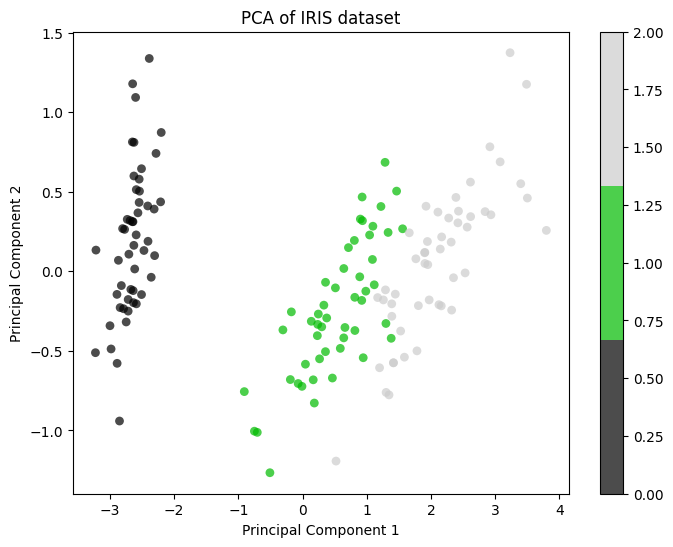

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Загрузка данных
data = load_iris()
X = data.data
y = data.target

# Инициализация PCA с 2 компонентами
pca = PCA(n_components=2)

# Применение PCA
X_transformed = pca.fit_transform(X)

# Визуализация
plt.figure(figsize=(8,6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 3))
plt.colorbar()
plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Простой код реализации без использования сторонних библиотек
Реализация PCA с нуля включает следующие шаги:**

- Центрирование данных.
- Вычисление ковариационной матрицы.
- Вычисление собственных векторов и значений ковариационной матрицы.
- Сортировка собственных значений в порядке убывания и выбор соответствующих собственных векторов.

In [ ]:
import numpy as np

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print(eig_vals, eig_vecs)

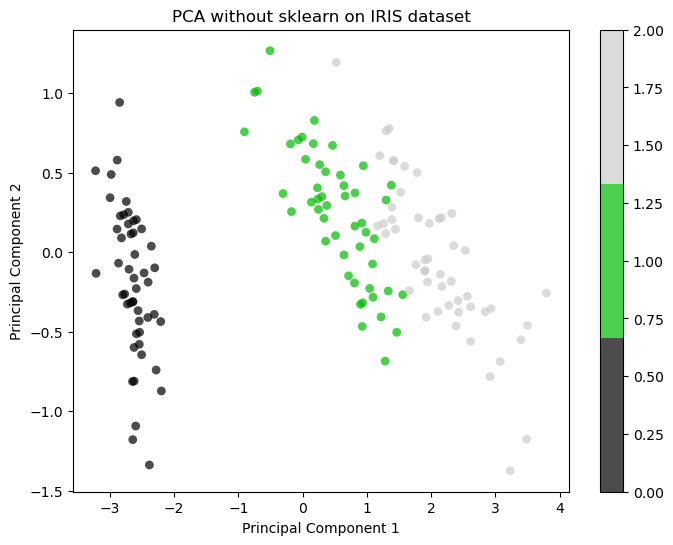

In [ ]:
import numpy as np

# Центрирование данных
X_centered = X - np.mean(X, axis=0)

# Вычисление ковариационной матрицы
cov_matrix = np.dot(X_centered.T, X_centered) / X.shape[0]

# Вычисление собственных векторов и значений
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Сортировка собственных значений и выбор первых k собственных векторов
sorted_idx = np.argsort(eig_vals)[::-1]
X_pca = np.dot(X_centered, eig_vecs[:, sorted_idx[:2]])

# Визуализация
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 3))
plt.colorbar()
plt.title('PCA without sklearn on IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



Давайте рассмотрим как изменяется доля объясненной дисперсии (то есть сохраненной информации) в зависимости от количества главных компонент в PCA на примере набора данных Iris.

**Для этого мы:**

- Применяем PCA ко всему набору данных без уменьшения размерности, чтобы получить все возможные главные компоненты.
- Используем атрибут explained_variance_ratio_ объекта PCA из sklearn для определения доли объясненной дисперсии каждой компонентой.
- Строим кумулятивную (накопленную) сумму объясненной дисперсии для визуализации.

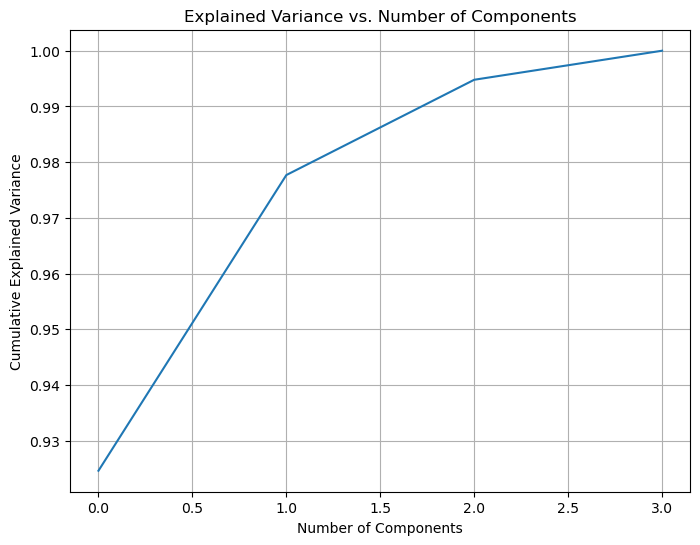

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Загрузка данных
data = load_iris()
X = data.data
y = data.target

# Применение PCA ко всему датасету
pca = PCA().fit(X)

# Визуализация
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


На графике по оси X представлено количество главных компонент, а по оси Y - кумулятивная доля объясненной дисперсии. Это позволяет увидеть, сколько компонент нужно, чтобы сохранить определенную долю исходной информации.

## Практическое задание: Применение PCA к набору данных

### Цель:

Освоить метод главных компонент (PCA) и понять, как он может быть использован для снижения размерности данных, сохраняя при этом максимум информации.

### Задачи:

1. **Подготовка данных**:
    - Загрузите набор данных, содержащий многомерные данные (например, набор данных о цветках `Iris`).
    - Разделите данные на обучающую и тестовую выборки.
  
2. **Исследование исходных данных**:
    - Визуализируйте данные в исходном пространстве. Если у вас более 3 признаков, выберите 2 или 3 из них для отображения.
    - Оцените распределение данных: есть ли кластеры или выбросы?
  
3. **Применение PCA**:
    - Примените PCA ко всему датасету, чтобы вычислить главные компоненты.
    - Визуализируйте долю объясненной дисперсии в зависимости от количества главных компонент.
    - Определите минимальное количество компонент, необходимое для сохранения 95% исходной дисперсии.

4. **Снижение размерности**:
    - Примените PCA с выбранным количеством компонент.
    - Визуализируйте преобразованные данные в новом пространстве главных компонент.

5. **Оценка эффективности** (дополнительно):
    - Обучите простую модель (например, логистическую регрессию) на исходных данных и на данных после снижения размерности с использованием PCA.
    - Сравните метрики качества на тестовой выборке для обеих моделей. Улучшилось ли качество после применения PCA?

### Подсказки:

- Используйте библиотеки `numpy`, `pandas`, `matplotlib` и `sklearn` для выполнения задачи.
- Помните, что цель PCA - не только снижение размерности, но и интерпретация структуры данных. Попробуйте интерпретировать главные компоненты.

### При успешном выполнении вы сможете:

- Понять, как PCA может быть использован для снижения размерности.
- Определить количество главных компонент для сохранения большей части информации.
- Интерпретировать направления главных компонент и их влияние на исходные данные.



## LDA (Linear Discriminant Analysis)

- **Математические основы**: максимизация разделимости классов.
- Реализация с использованием `sklearn`.

---

## LDA (Linear Discriminant Analysis)

### История появления LDA

Linear Discriminant Analysis (LDA) или линейный дискриминантный анализ был предложен Рональдом Фишером в 1936 году. Фишер разработал этот метод в качестве двумерного подхода к классификации различных видов ирисов. Его целью было определить "оптимальные" линейные комбинации измерений для разделения трех видов ирисов на основе статистики пяти измерений.

### Математические основы

Цель LDA - найти проекцию пространства признаков, которая максимизирует разделимость между несколькими классами. Этот метод стремится максимизировать отношение межклассовой дисперсии к внутриклассовой дисперсии в наборе данных, что в свою очередь помогает улучшить качество классификации.

Математически это можно выразить следующим образом:

Рассмотрим два класса. Пусть $m_1$ и $m_2$ обозначают векторы средних значений классов, $S_1$ и $S_2$ - ковариационные матрицы классов. Тогда линейная комбинация признаков, которая максимизирует разделимость, задается:

$[ w \propto (S_1 + S_2)^{-1} (m_2 - m_1) ]$

### Реализация с использованием `sklearn`

В библиотеке `sklearn` LDA доступен как `LinearDiscriminantAnalysis`. Этот классификатор также может использоваться в качестве метода снижения размерности.

Пример:
```python
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

Здесь X - это ваши данные, а y - метки классов. После выполнения этого кода, X_lda будет содержать данные, проецированные на оси, которые максимально разделяют классы.


Для визуализации работы LDA, давайте воспользуемся классическим набором данных - ирисы Фишера. Перед тем как визуализировать, нам потребуется выполнить следующие шаги:

- Загрузка данных.
- Применение LDA для снижения размерности до 2 компонент.
- Визуализация результатов.
**<center>Вот пример кода:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 1. Загрузка данных
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 2. Применение LDA
lda = LinearDiscriminantAnalysis(n_components=3)
X_r2 = lda.fit_transform(X[:, :4], y)
y

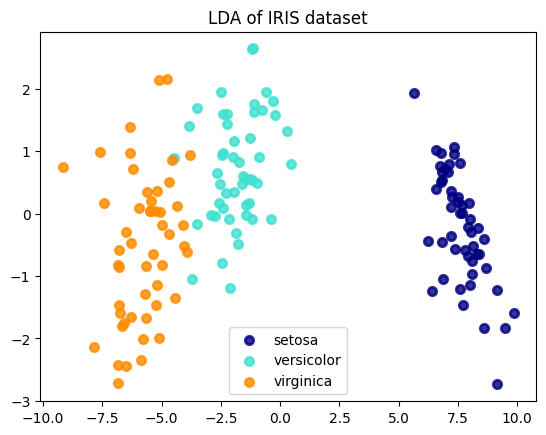

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 1. Загрузка данных
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 2. Применение LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit_transform(X, y)

# 3. Визуализация результатов
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()


Чтобы понять, какое количество компонент в LDA оптимально, вы можете визуализировать общий объясненный дисперсионный относительно числа компонент, аналогично тому, как это делается в PCA.

Однако, есть важное замечание: LDA зависит от классов, и максимальное число компонент, которое вы можете использовать, равно min(n_classes - 1, n_features).

Ниже приведен код:

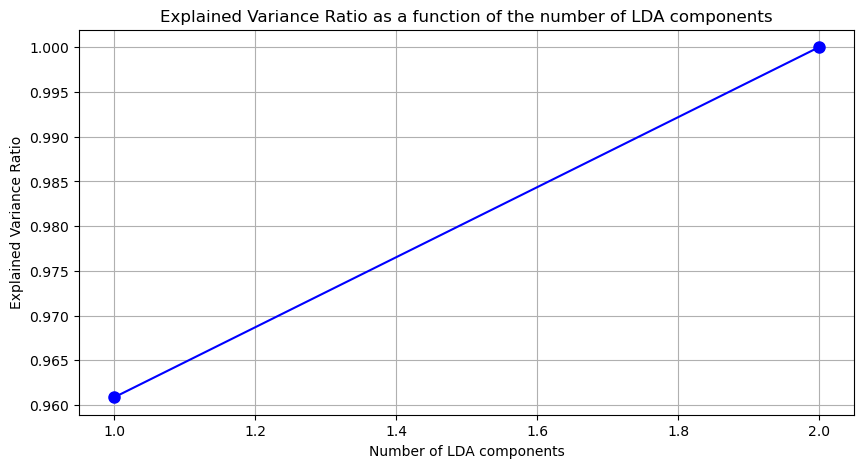

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import PolynomialFeatures

# Загрузка данных
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Преобразование данных с использованием PolynomialFeatures
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

# LDA
explained_var_ratios = []
components_range = range(1, min(X_poly.shape[1], len(set(y))))
for n_components in components_range:
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    X_lda = lda.fit_transform(X_poly, y)
    explained_var_ratios.append(np.sum(lda.explained_variance_ratio_))

# Визуализация
plt.figure(figsize=(10,5))
plt.plot(components_range, explained_var_ratios, 'bo-', markersize=8)
plt.xlabel('Number of LDA components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio as a function of the number of LDA components')
plt.grid(True)
plt.show()


В этом коде мы вначале генерируем дополнительные полиномиальные признаки для нашего набора данных. Затем для каждого возможного числа компонент LDA (до предельного значения) вычисляем и суммируем объясненные дисперсионные соотношения. Наконец, результаты визуализируются на графике.

Линейный дискриминантный анализ (LDA)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Подготовка данных
data = load_wine()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)

(124, 13) (124,)


In [ ]:
y_train

array([2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1,
       0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2,
       2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1])

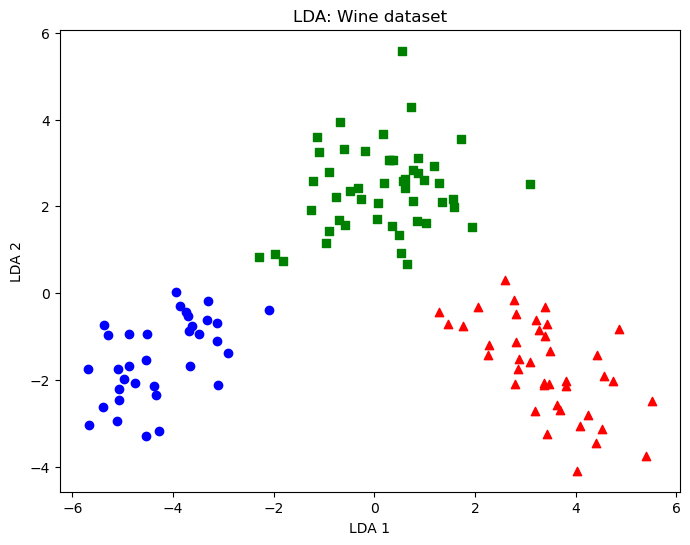

LDA-based Logistic Regression Accuracy: 0.98


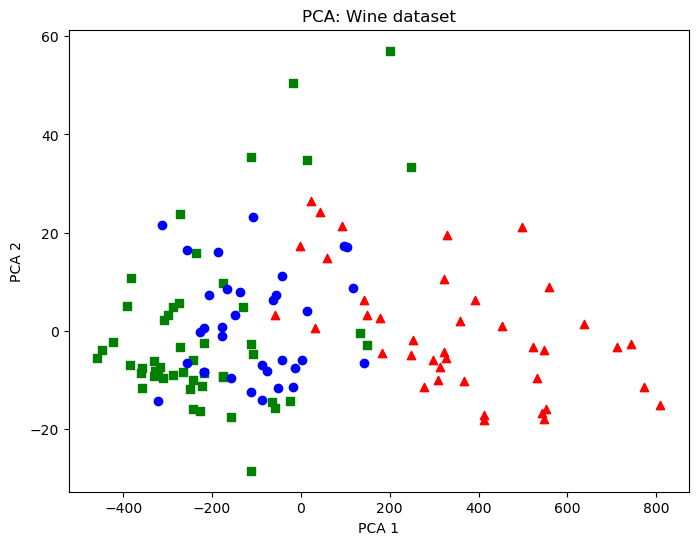

PCA-based Logistic Regression Accuracy: 0.69


In [ ]:
# Импорт необходимых библиотек и функций
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Подготовка данных
data = load_wine()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Применение LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

plt.figure(figsize=(8, 6))
for label, marker, color in zip(range(3), ('^', 's', 'o'), ('red', 'green', 'blue')):
    plt.scatter(X_train_lda[y_train == label, 0],
                X_train_lda[y_train == label, 1],
                marker=marker, color=color)
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.title('LDA: Wine dataset')
plt.show()

# 3. Классификация с использованием LDA
lr = LogisticRegression()
lr.fit(X_train_lda, y_train)
y_pred = lr.predict(X_test_lda)
print(f"LDA-based Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# 4. Сравнение с PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

plt.figure(figsize=(8, 6))
for label, marker, color in zip(range(3), ('^', 's', 'o'), ('red', 'green', 'blue')):
    plt.scatter(X_train_pca[y_train == label, 0],
                X_train_pca[y_train == label, 1],
                marker=marker, color=color)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA: Wine dataset')
plt.show()

lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)
print(f"PCA-based Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_pca):.2f}")


## t-SNE

- **Математические основы**: вероятностное снижение размерности с сохранением локальных структур.
- Реализация с использованием `sklearn`.

---

## t-SNE (t-distributed Stochastic Neighbor Embedding)

### История создания

t-SNE был представлен в 2008 году Лоуренсом ван дер Маатеном и Джеффри Хинтоном. Этот метод был разработан как способ визуализации многомерных данных, сохраняя при этом локальные структуры и детали. Он особенно полезен для визуализации комплексных наборов данных, где другие методы, такие как PCA, могут не уловить все нюансы структуры данных.

### Математические основы

Основная идея t-SNE заключается в конвертации евклидовых расстояний между точками в вероятностные значения, которые представляют схожесть между точками.

1. В исходном пространстве вероятность схожести для каждой пары точек $i$ и $j$ определяется как:

\$  p_{ij} = \frac{\exp(-||x_i - x_j||^2 / 2\sigma^2)}{\sum_{k \neq i} \exp(-||x_i - x_k||^2 / 2\sigma^2)} \$

где $\sigma$ - это стандартное отклонение гауссовского (нормального) распределения вокруг точки $i$.

2. В сниженном пространстве используется t-распределение Стьюдента для моделирования схожести:

\$ q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \neq i} (1 + ||y_i - y_k||^2)^{-1}} \$

3. t-SNE минимизирует дивергенцию Кульбака-Лейблера между $p_{ij}$ и $q_{ij}$ по всем парам точек:

\$ KL(P||Q) = \sum_{i,j} p_{ij} \log \frac{p_{ij}}{q_{ij}} \$


In [ ]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
X, y = digits.data, digits.target
X.shape

(1797, 64)

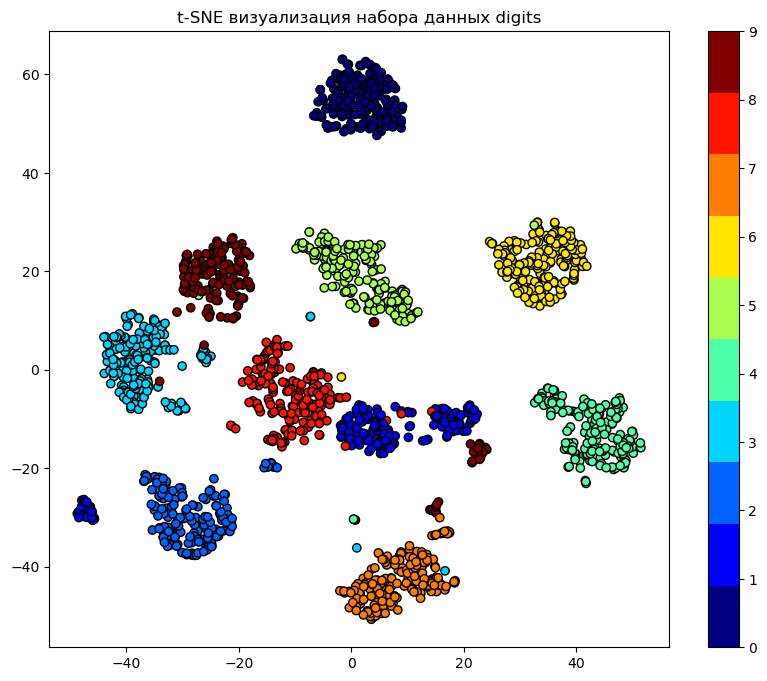

In [ ]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
X, y = digits.data, digits.target

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, edgecolors='k', cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar()
plt.title('t-SNE визуализация набора данных digits')
plt.show()


## Использование t-SNE для визуализации данных**


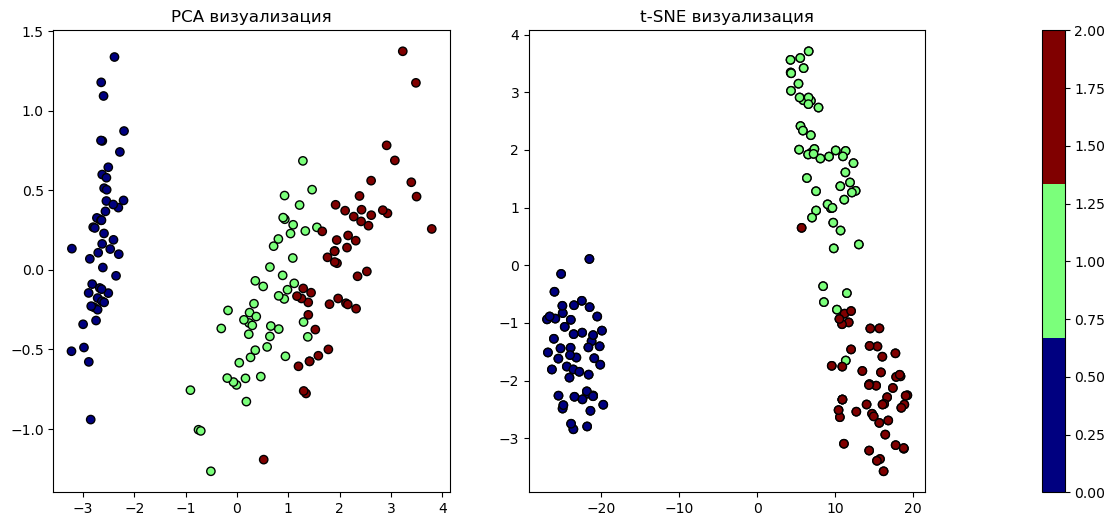

In [ ]:
# Решение

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Загрузка данных
iris = load_iris()
X, y = iris.data, iris.target

# Применение PCA
X_pca = PCA(n_components=2).fit_transform(X)

# Применение t-SNE
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

# Визуализация результатов
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap=plt.cm.get_cmap('jet', 3))
axes[0].set_title('PCA визуализация')

axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, edgecolors='k', cmap=plt.cm.get_cmap('jet', 3))
axes[1].set_title('t-SNE визуализация')

plt.colorbar(mappable=axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, edgecolors='k', cmap=plt.cm.get_cmap('jet', 3)), ax=axes, orientation='vertical', pad=0.1)
plt.show()


## UMAP

- **Математические основы**: комбинация топологических и геометрических идей.
- Реализация с использованием библиотеки `umap-learn`.

---

## UMAP (Uniform Manifold Approximation and Projection)

### История создания

UMAP был представлен в 2018 году Леландом МакИннесом, Джоном Хейтом, и Стивом Саулом. Этот метод появился как ответ на потребность в более быстром и гибком методе снижения размерности по сравнению с t-SNE.

### Математические основы

UMAP основан на теории топологических данных. Он пытается аппроксимировать сложную многообразную структуру данных в пространстве низкой размерности, сохраняя при этом топологическую структуру.

1. Начиная с представления данных в виде графа, где вершины соответствуют отдельным точкам данных, UMAP применяет фазовую функцию, чтобы создать топологическое представление графа.

2. Далее, метод использует нормализацию Лапласа для преобразования топологического представления в набор координат в евклидовом пространстве низкой размерности.

Основное уравнение UMAP может быть выражено следующим образом:

\$[ f: X \to Y \]$

где \$( X \)$ - исходное пространство данных, а $\( Y \)$ - пространство низкой размерности.

### Реализация с использованием библиотеки `umap-learn`

Для использования UMAP в Python вы можете использовать библиотеку `umap-learn`. Она предоставляет удобный и простой интерфейс для применения UMAP к вашим данным.

```python
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)


In [ ]:
#!pip install umap-learn

(посхалка для тех кто дошел до конца, попробовать реализовать UMAP на любом сете и иметь представление, что это за метод